In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_cleaned.csv')

In [4]:
df.head(2)

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0


In [5]:
df.drop(['day','month','year',	'Unnamed: 0'],axis=1, inplace=True)

In [6]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0


In [7]:
df.Classes.value_counts()


fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df['Classes']=np.where(df.Classes.str.contains('not fire'),0,1)

In [11]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot: >

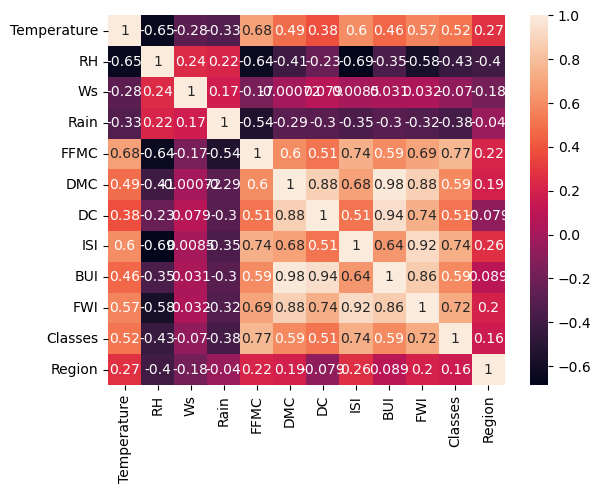

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
x=df.drop('FWI', axis=1)
y=df['FWI']


In [15]:
x.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [16]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [20]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<AxesSubplot: >

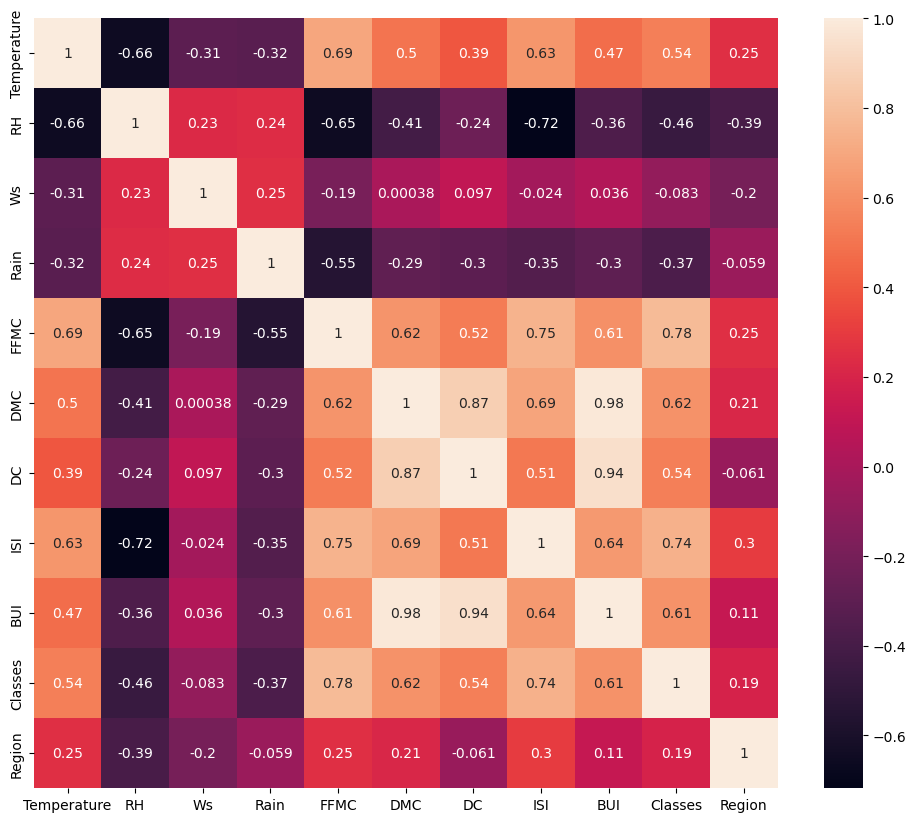

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True)

In [24]:
# clearing multi colinearity in the independent features
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features=correlation(x_train, 0.85)

In [26]:
corr_features

{'BUI', 'DC'}

In [27]:
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [29]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/tmp/ipykernel_105/1503260592.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scaling')

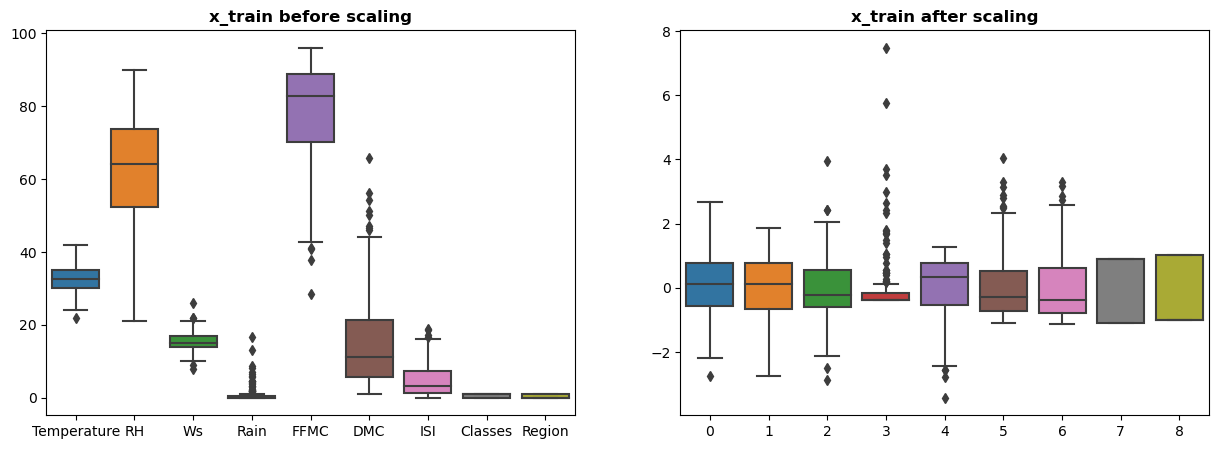

In [31]:
# Box plot to understand the effects of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling', weight='bold')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling', weight='bold')

# Linear Regression Model

Mean Absolute Error: 0.5468236465249985
R2 Score:  0.9847657384266951


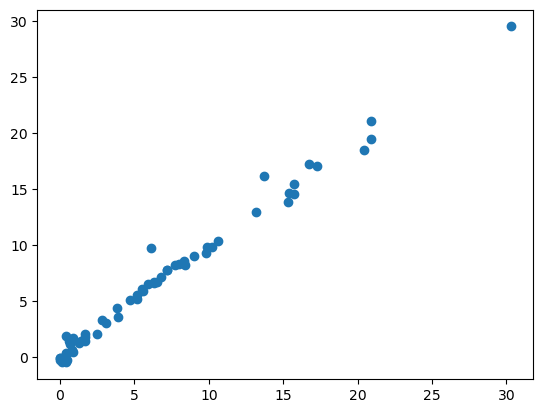

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)
y_pred = linear.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)

# Lasso Regression

Mean Absolute Error:  1.133175994914409
The R2 Score is:  0.9492020263112388


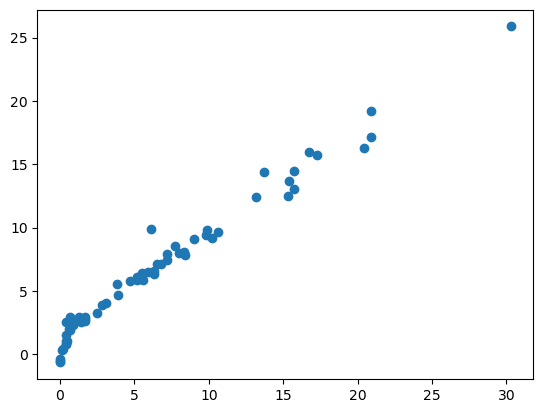

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('The R2 Score is: ', score)
plt.scatter(y_test, y_pred)

Mean Absolute Error is :  0.6199701158263433
R2 Score is:  0.9820946715928275


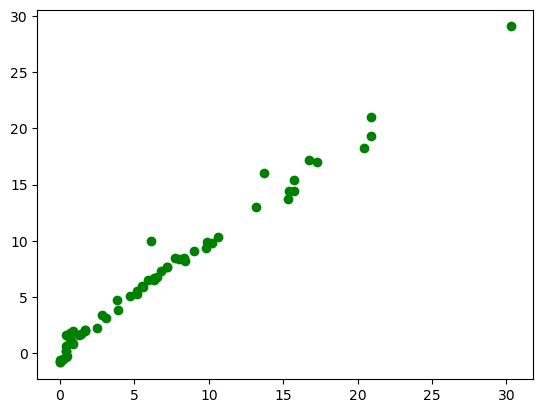

In [53]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled, y_train)
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_pred, c='g')
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error is : ', mae)
print('R2 Score is: ', score)

# Ridge Regression Model

Mean Absolute Error is :  0.5642305340105692
R2 Score is:  0.9842993364555513


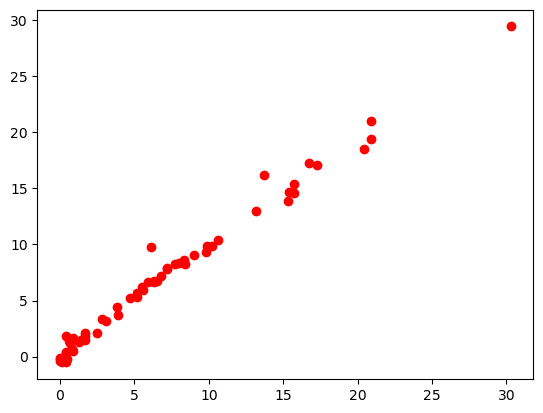

In [46]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error is : ', mae)
print('R2 Score is: ', score)
plt.scatter(y_test, y_pred, c='r')

Mean Absolute Error is :  0.5642305340105692
R2 Score is:  0.9842993364555513


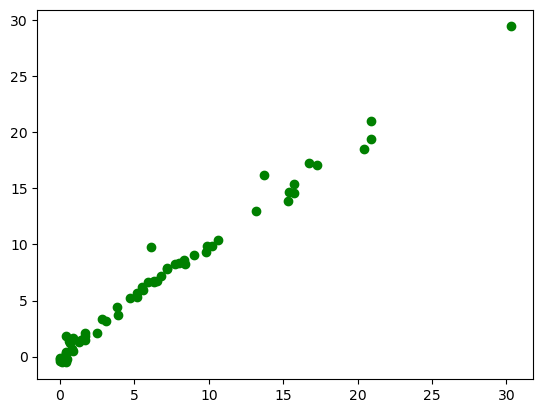

In [51]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_pred = ridgecv.predict(x_test_scaled)
plt.scatter(y_test, y_pred, c='g')
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error is : ', mae)
print('R2 Score is: ', score)

# Elasticnet Regression

Mean Absolute Error is :  1.8822353634896005
R2 Score is:  0.8753460589519703


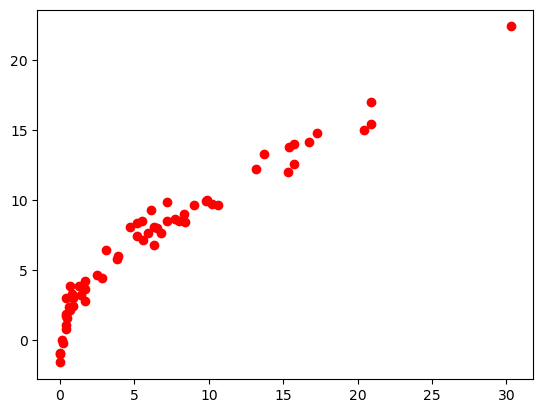

In [55]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_pred = elastic.predict(x_test_scaled)
plt.scatter(y_test, y_pred, c='r')
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error is : ', mae)
print('R2 Score is: ', score)

Mean Absolute Error is :  0.6575946731430898
R2 Score is:  0.9814217587854941


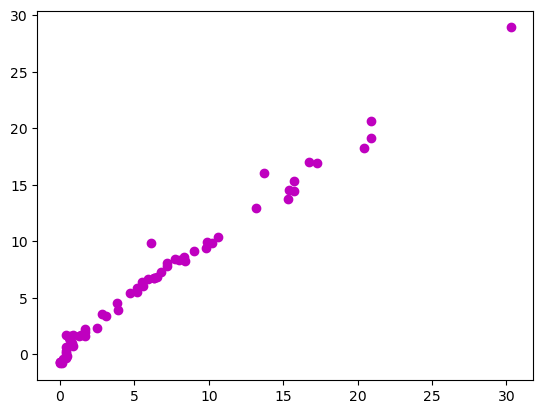

In [60]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
elasticcv.fit(x_train_scaled, y_train)
y_pred = elasticcv.predict(x_test_scaled)
plt.scatter(y_test, y_pred, c='m')
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error is : ', mae)
print('R2 Score is: ', score)

In [61]:
## Pickle the machine learning models, preprocessing model, standerdscaler

In [62]:
scaler

StandardScaler()

In [63]:
ridge

Ridge()

In [64]:
import pickle
pickle.dump(scaler,open ('scaler.pkl', 'wb'))
pickle.dump(ridge,open ('ridge.pkl', 'wb'))